**The Dataset is about bank customers churning and can be found on Kaggle:**   
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

**Disclaimer: The dataset above is simulated**

## Load the Data

In [10]:
# Load the required libraries for data manipulation and data visualization 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [70]:
# Load the dataset from local directory into a Pandas dataframe called 'df'
df = pd.read_csv('Churn_Modelling.csv', index_col=None)

In [71]:
# View the shape of the data using .shape
df.shape

(10000, 14)

In [72]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Twice as many customers from france than from germany and spain. Germany + spain = France**


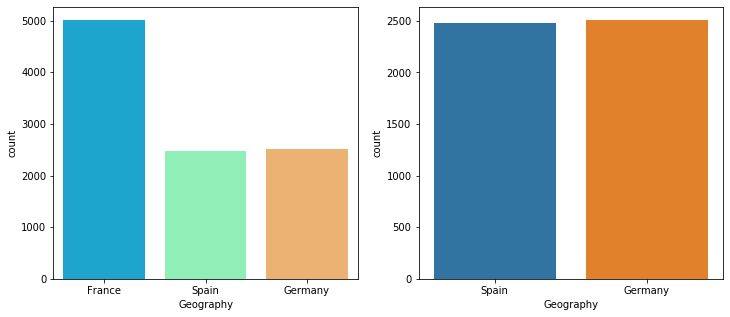

In [84]:
# Customer breakdown by Geography

fig, axs = plt.subplots(1,2, figsize=(12,5))

sns.countplot(df['Geography'], ax=axs[0],palette='rainbow')
sns.countplot(df[(df['Geography'] == 'Spain') | (df['Geography'] == 'Germany')]['Geography'], ax= axs[1])#, #palette='glow")

plt.show()


**Germany had the highest number of customers who exited**


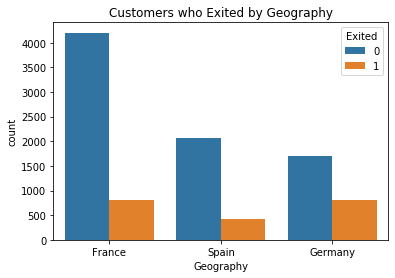

In [174]:
# Customers who exited by geography
sns.countplot(df['Geography'], hue=df['Exited'])
plt.title('Customers who Exited by Geography')
plt.show()

- **There were a higher number of females who exited.**
- **France had highest number of Females who exited the bank** 
- **Germany had highest number of Males who exited the bank**

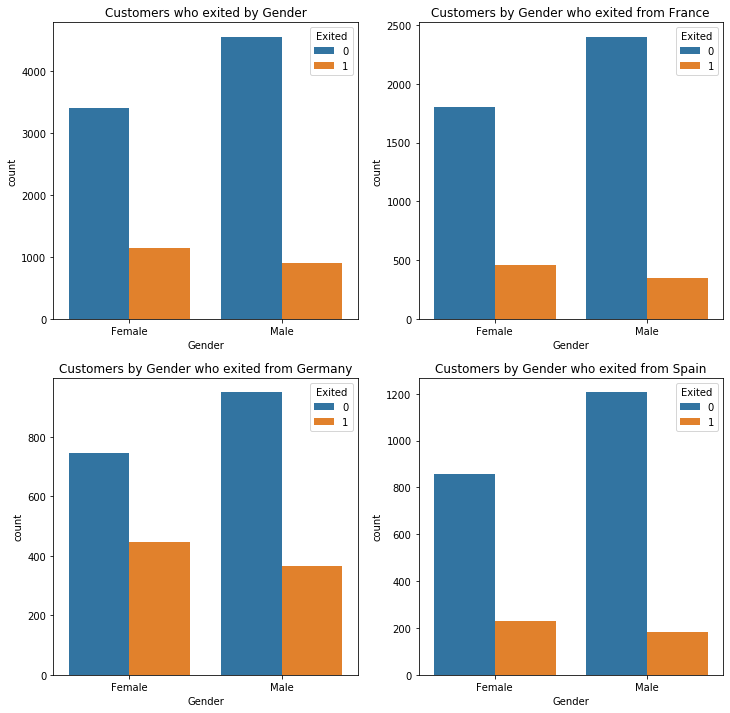

In [176]:
# Customers who exited by Gender and Geography

fig, axs = plt.subplots(2, 2, figsize=(12,12))

sns.countplot(df['Gender'], hue=df['Exited'],ax = axs[0,0])
axs[0,0].set_title('Customers who exited by Gender')

sns.countplot(df[df['Geography'] == 'France']['Gender'], hue=df['Exited'],ax=axs[0,1])
axs[0,1].set_title('Customers by Gender who exited from France')

sns.countplot(df[df['Geography'] == 'Germany']['Gender'], hue=df['Exited'], ax=axs[1,0])
axs[1,0].set_title('Customers by Gender who exited from Germany')

sns.countplot(df[df['Geography'] == 'Spain']['Gender'], hue=df['Exited'], ax=axs[1,1])
axs[1,1].set_title('Customers by Gender who exited from Spain')

plt.show()

- **France has the highest female and male customers**

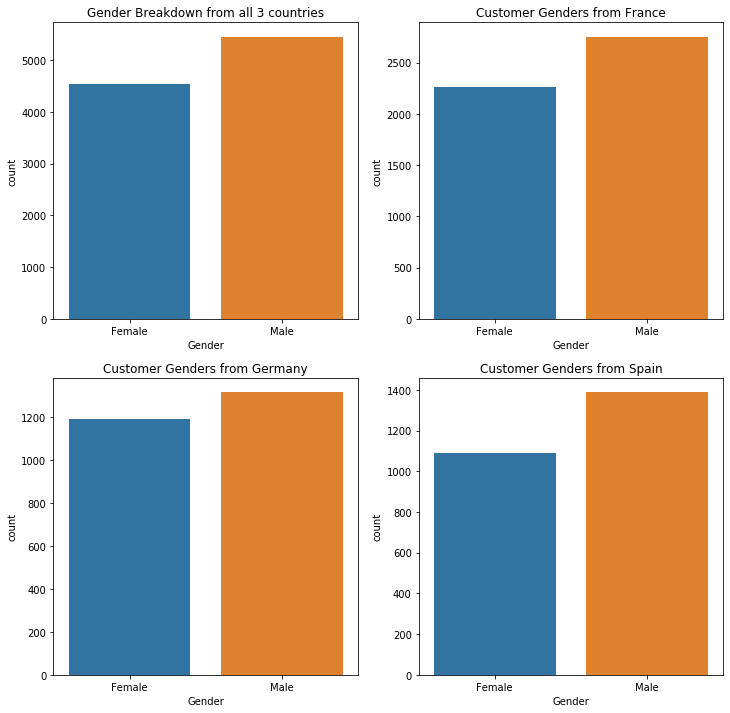

In [98]:
# Breakdown of gender by country? 

fig, axs = plt.subplots(2, 2, figsize=(12,12))

sns.countplot(df['Gender'], ax = axs[0,0])
axs[0,0].set_title('Gender Breakdown from all 3 countries')

sns.countplot(df[df['Geography'] == 'France']['Gender'], ax=axs[0,1])
axs[0,1].set_title('Customer Genders from France')

sns.countplot(df[df['Geography'] == 'Germany']['Gender'], ax=axs[1,0])
axs[1,0].set_title('Customer Genders from Germany')

sns.countplot(df[df['Geography'] == 'Spain']['Gender'], ax=axs[1,1])
axs[1,1].set_title('Customer Genders from Spain')

plt.show()

- **There is no significant difference in the distribution of both gender's credit scores**

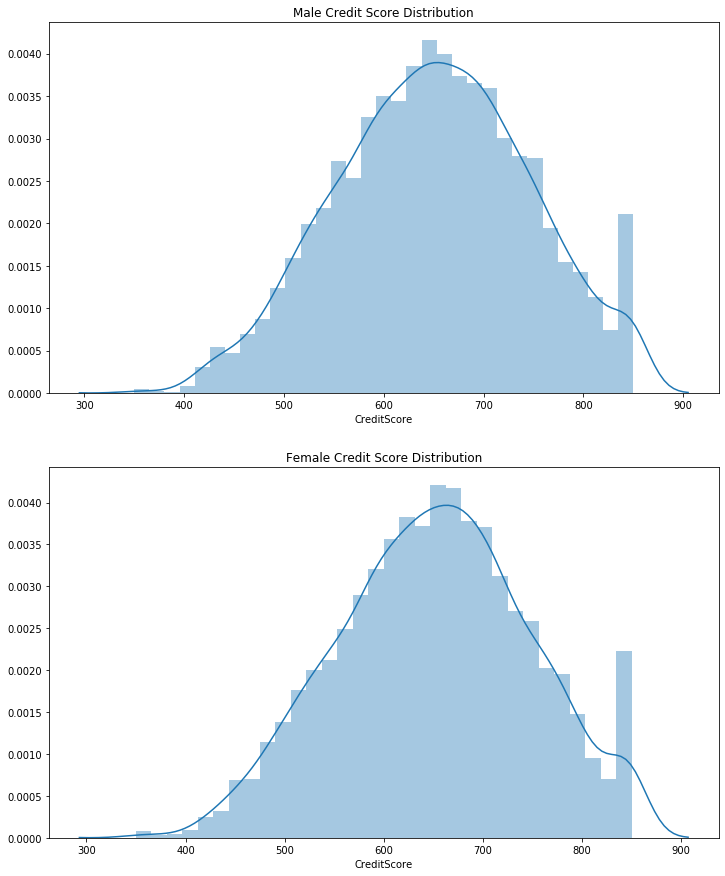

In [173]:
#Distribution of credit score by gender? 

fig, axs = plt.subplots(2, figsize=(12,15))

sns.distplot(df[df['Gender'] == 'Male']['CreditScore'], ax=axs[0])
axs[0].set_title('Male Credit Score Distribution')

sns.distplot(df[df['Gender'] == 'Female']['CreditScore'], ax=axs[1])
axs[1].set_title('Female Credit Score Distribution')



plt.show()

**Customers who exited had a roughly lower average credit score.**

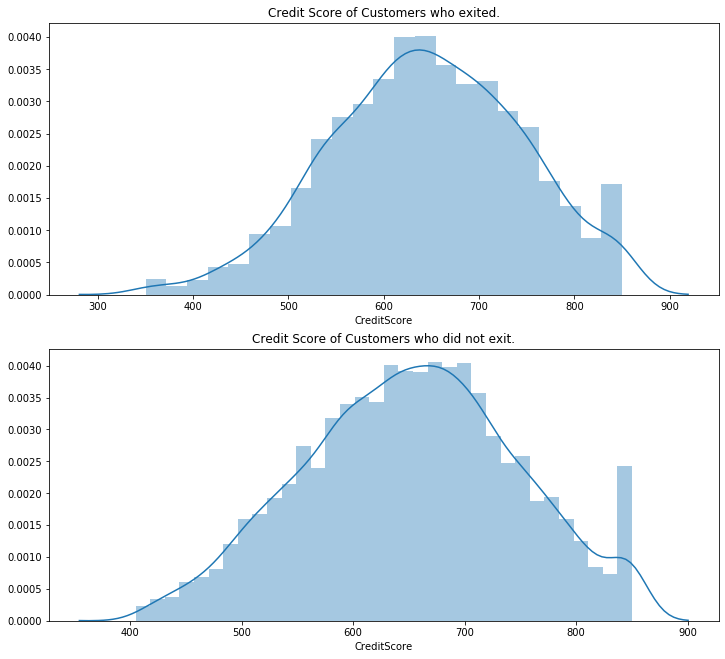

In [159]:
fig, axs = plt.subplots(2, 1, figsize=(12,11))

sns.distplot(df[df['Exited'] == 1]['CreditScore'], ax=axs[0])
axs[0].set_title('Credit Score of Customers who exited.')

sns.distplot(df[df['Exited'] == 0]['CreditScore'], ax=axs[1])
axs[1].set_title('Credit Score of Customers who did not exit.')

plt.show()

**Customers who had a credit card exited more than customers who did not** 

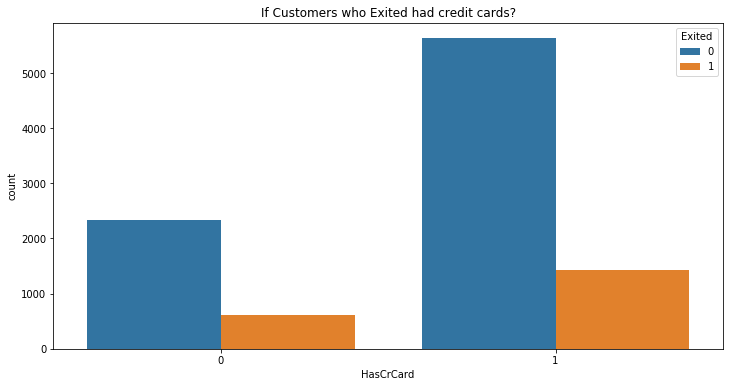

In [171]:
# Customers who exited by Gender 

plt.figure(figsize=(12,6))

sns.countplot(df['HasCrCard'], hue=df['Exited'])
plt.title('If Customers who Exited had credit cards?')

#sns.countplot(df[df['Geography'] == 'Spain']['Gender'], hue=df['Exited'], ax=axs[1,1])
#axs[1,1].set_title('Customers by Gender who exited from Spain')

plt.show()

**Customers age who exited has a more uniform distribution**

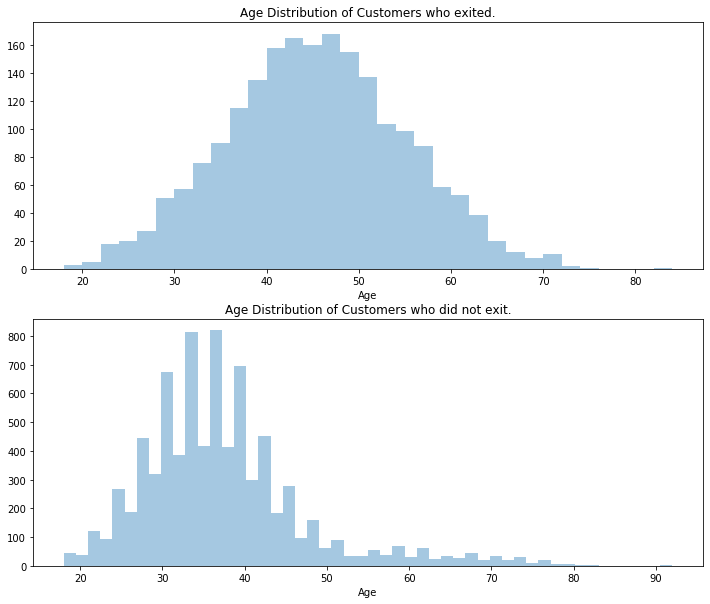

In [183]:
# Customers who exited by Gender 

fig, axs = plt.subplots(2,1, figsize=(12,10))

sns.distplot(df[df['Exited'] == 1]['Age'], hist=True, kde=False, ax=axs[0])
axs[0].set_title('Age Distribution of Customers who exited.')
                        
sns.distplot(df[df['Exited'] == 0]['Age'], hist=True, kde=False, ax=axs[1])
plt.title('Age Distribution of Customers who did not exit.')

plt.show()

**Majority of the people who exited were between 40 and 60 years old**

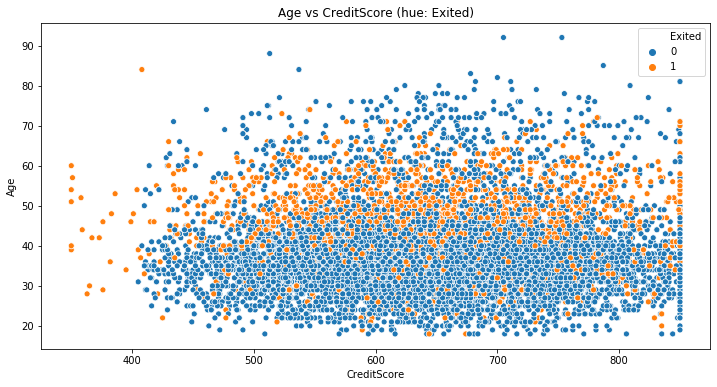

In [191]:
# scatter plot of credit score and age

plt.figure(figsize=(12,6))

sns.scatterplot(df['CreditScore'],df['Age'], hue=df['Exited'])
plt.title('Age vs CreditScore (hue: Exited)')

plt.show()